# Diwali_Sales_Analysis

In [335]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [336]:
# import csv file

df = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')

In [337]:
print(np.shape(df))

(11251, 15)


In [338]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [340]:
#drop unrelated/blank columns

df.drop(['Status', 'unnamed1'], axis=1, inplace=True, errors='ignore')


In [341]:
#check for null values

pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [342]:
# drop null values
df.dropna(inplace=True)

In [343]:
# change data type
df['Amount'] = df['Amount'].astype('int')

In [344]:
df['Amount'].dtypes

dtype('int32')

In [345]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


# Exploratory Data Analysis


# Gender

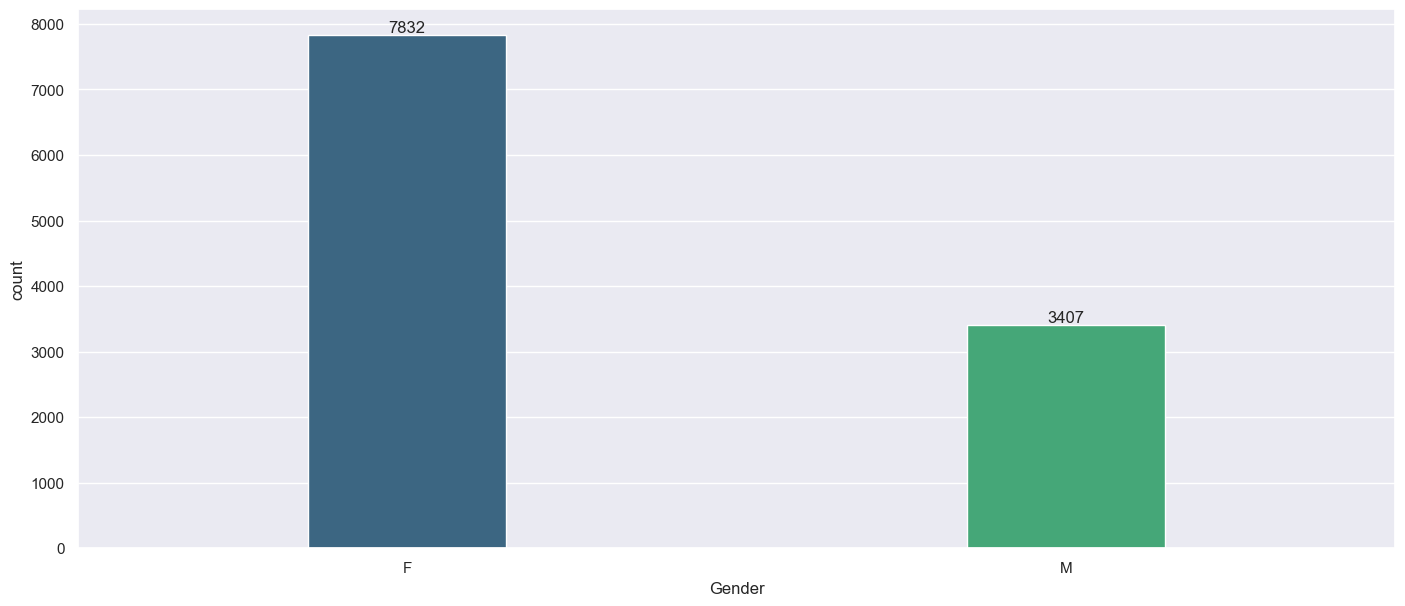

In [346]:
# plotting a bar chart for Gender and it's count

count_gender= sns.countplot(data=df, x='Gender', palette='viridis',width=0.3 )
for bars in count_gender.containers:
   count_gender.bar_label(bars)



  Gender    Amount
0      F  74335853
1      M  31913276


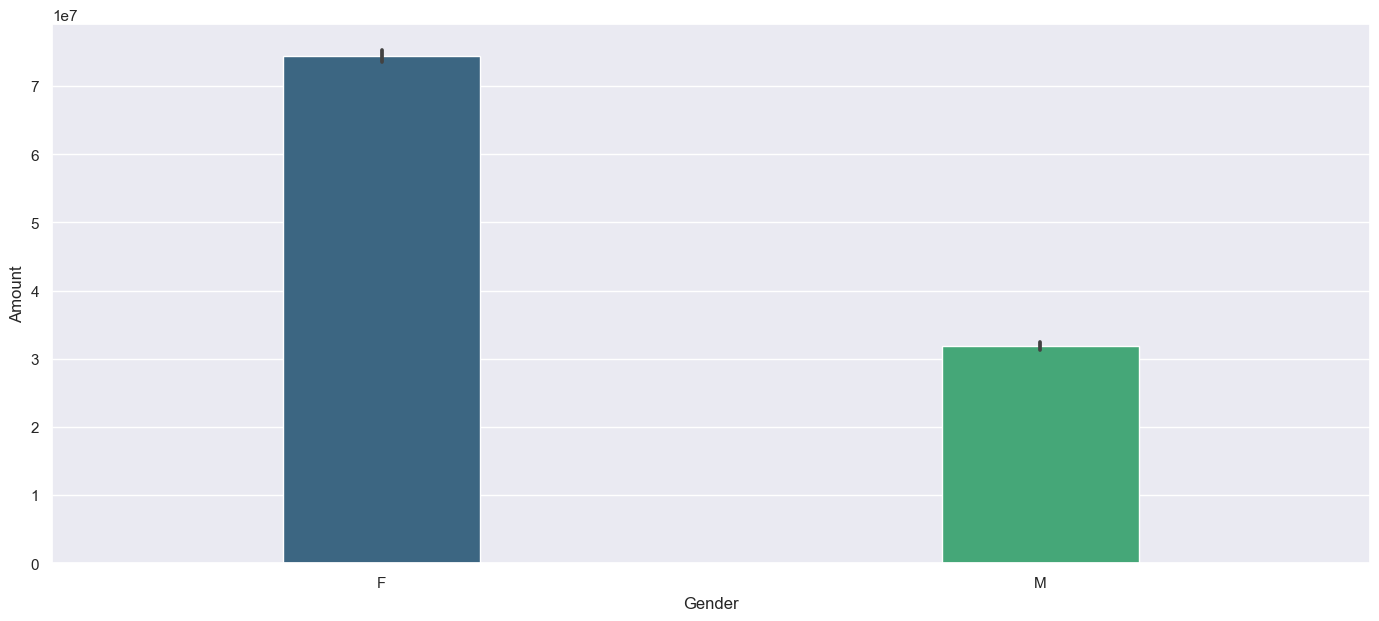

In [347]:
# plotting a bar chart for gender vs total amount

sales_gen = df.groupby('Gender')['Amount'].sum().reset_index()
print(sales_gen)
sales_gen=sns.barplot(x = 'Gender',y= 'Amount' ,data = df, estimator="sum", palette='viridis',width=0.3)
sns.set(rc={'figure.figsize':(7,2)})
plt.show()




*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*






# Age



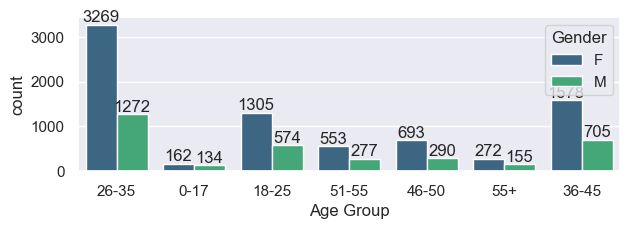

In [348]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender',palette='viridis')

for bars in ax.containers:
    ax.bar_label(bars)

  Age Group    Amount
0      0-17   2699653
1     18-25  17240732
2     26-35  42613442
3     36-45  22144994
4     46-50   9207844
5     51-55   8261477
6       55+   4080987


[]

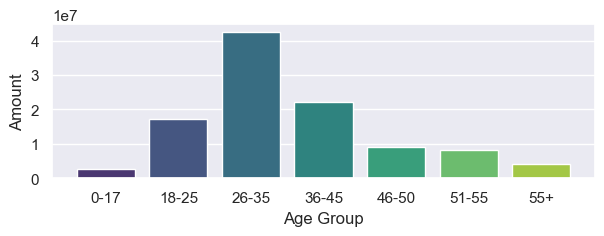

In [349]:
# Total Amount vs Age Group
dx=df.groupby('Age Group')['Amount'].sum().reset_index()
print(dx)
sns.barplot(data=dx, x='Age Group', y='Amount',palette='viridis')
sns.set(rc={'figure.figsize':(10,4)})
plt.plot()


*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

# State

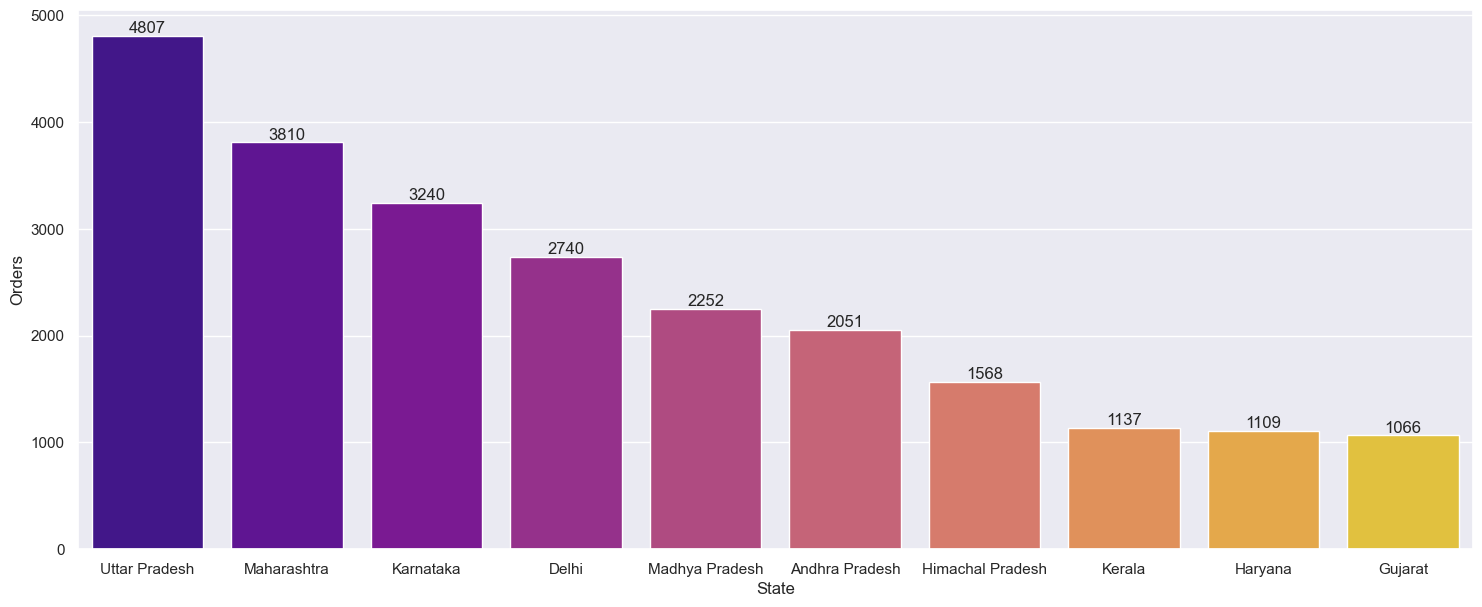

In [360]:
dx=df.groupby('State')['Orders'].sum().reset_index().sort_values(by='Orders', ascending=False).head(10)
dx=sns.barplot(data=dx, x='State', y='Orders',estimator="sum",palette='plasma')
for bars in dx.containers:
   dx.bar_label(bars)
sns.set(rc={'figure.figsize':(17,7)})

plt.show()





*Total number of orders from top 10 states*

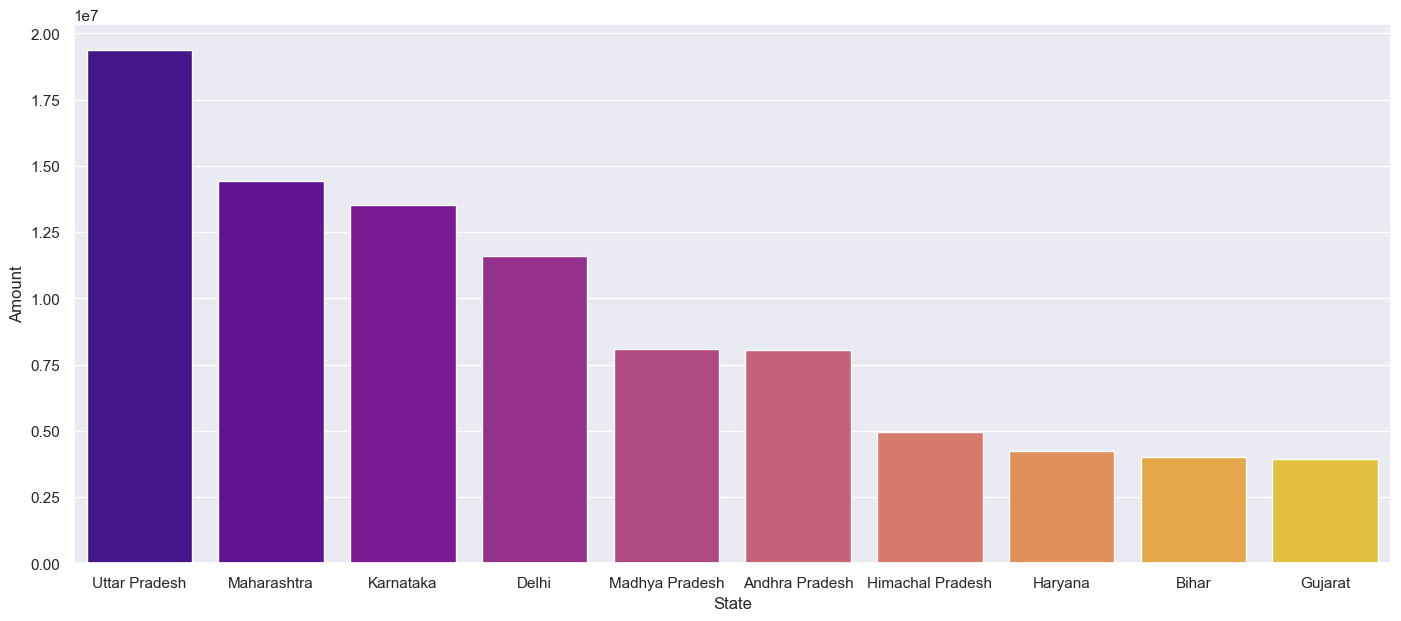

In [351]:
dx=df.groupby('State')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False).head(10)
dx=sns.barplot(data=dx, x='State', y='Amount',estimator="sum",palette='plasma')
sns.set(rc={'figure.figsize':(17,7)})

plt.show()


*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*


## Marital Status

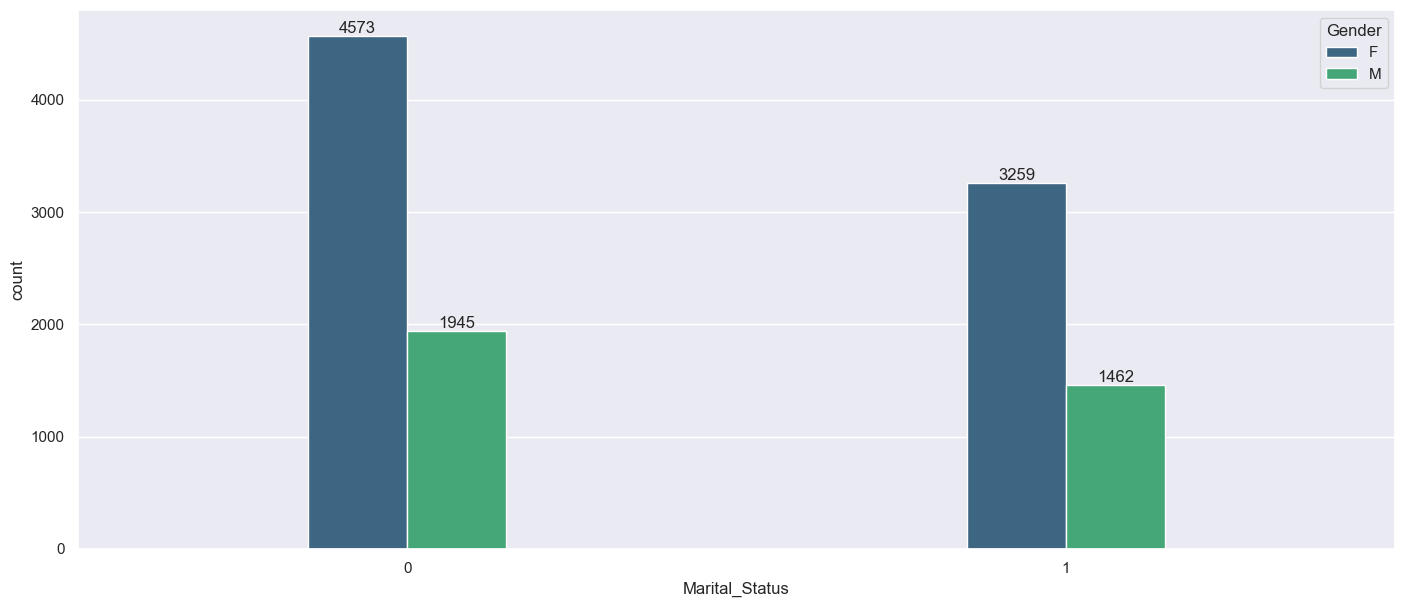

In [352]:
dx=sns.countplot(data=df, x='Marital_Status',hue='Gender',width=0.3,palette='viridis')
for bars in dx.containers:
   dx.bar_label(bars)
plt.show()

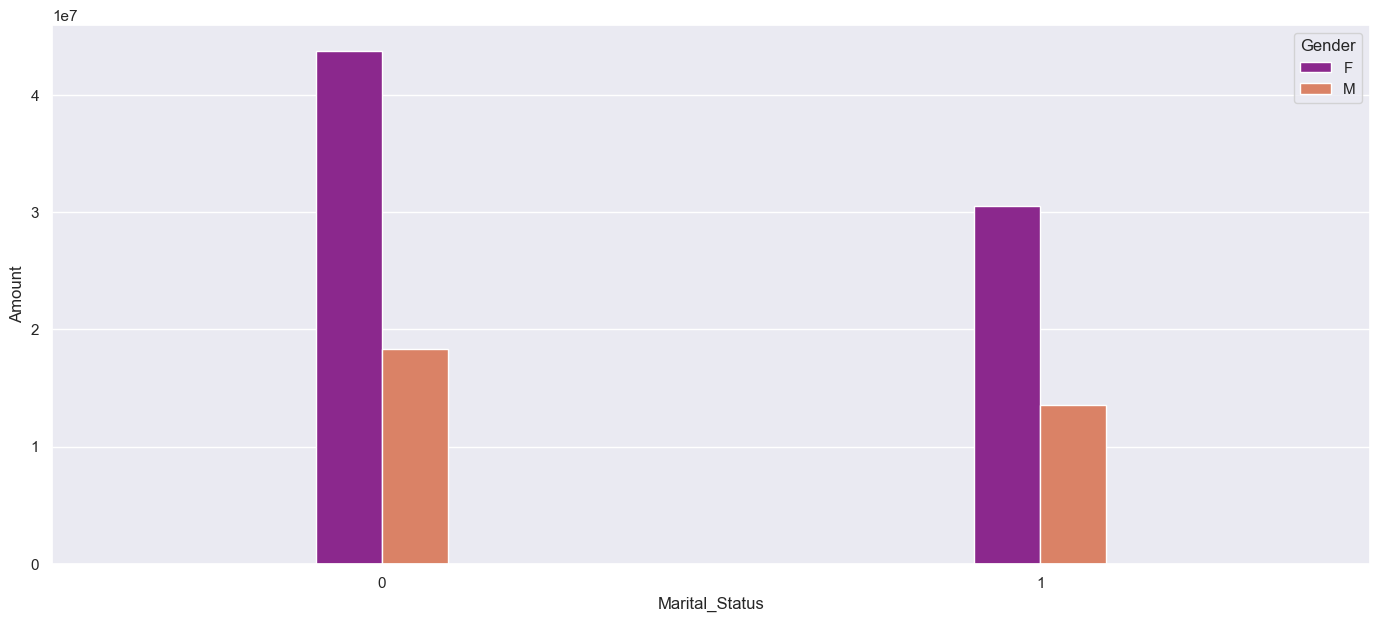

In [353]:
dx=df.groupby(['Marital_Status','Gender'])['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False)
dx=sns.barplot(data=dx, x='Marital_Status', y='Amount',palette='plasma',width=0.2,hue='Gender')


plt.show()

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

# Occupation

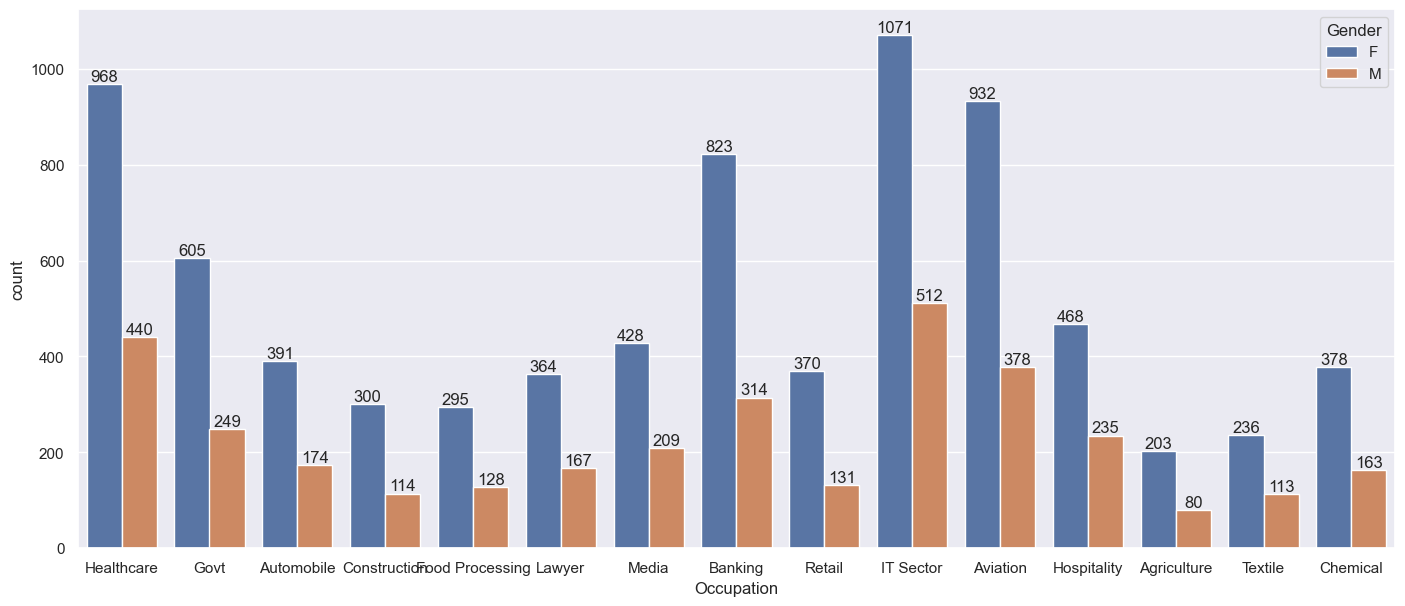

In [354]:
dx=sns.countplot(data=df,x="Occupation",hue='Gender')
for bars in dx.containers:
   dx.bar_label(bars)
plt.show()

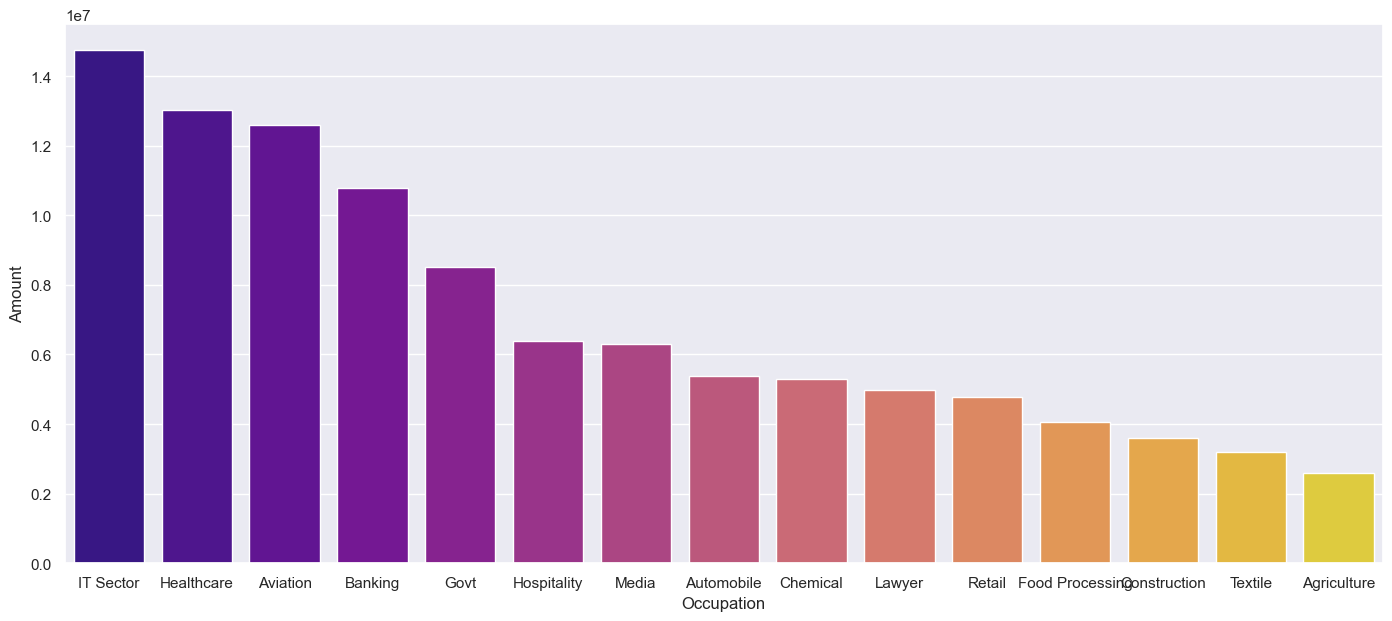

In [355]:
dx=df.groupby('Occupation')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False)
dx=sns.barplot(data=dx, x='Occupation', y='Amount',estimator="sum",palette='plasma')
sns.set(rc={'figure.figsize':(20,5)})

plt.show()

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

# Product Category

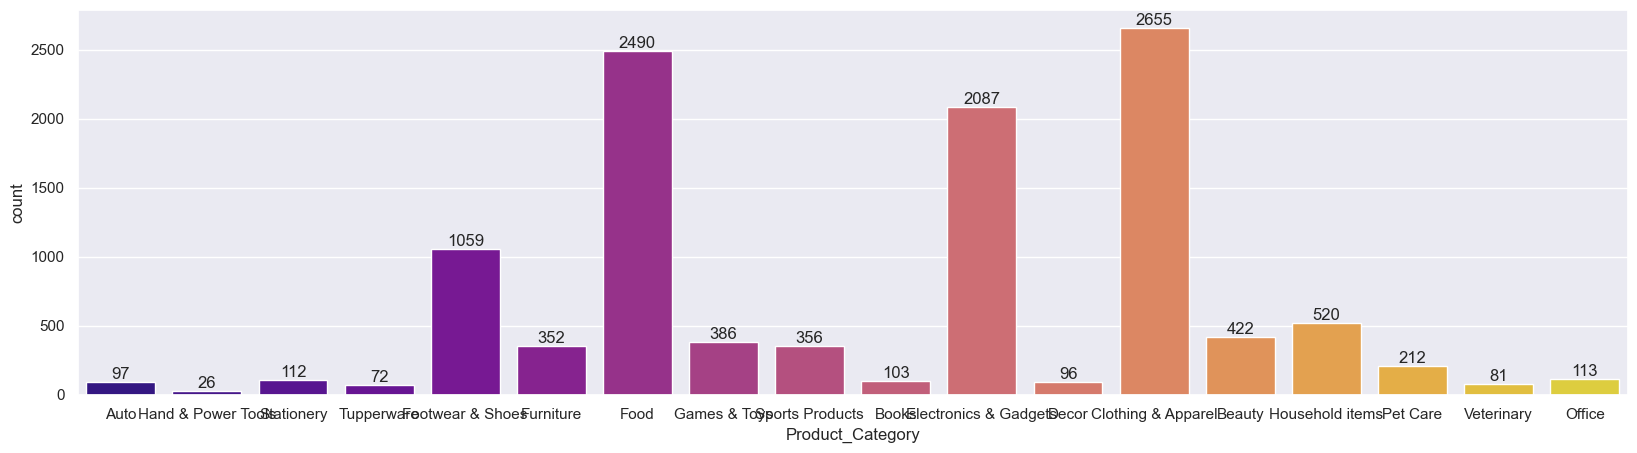

In [356]:
ax=sns.countplot(data=df,x='Product_Category',palette='plasma')
sns.set(rc={'figure.figsize':(25,7)})
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

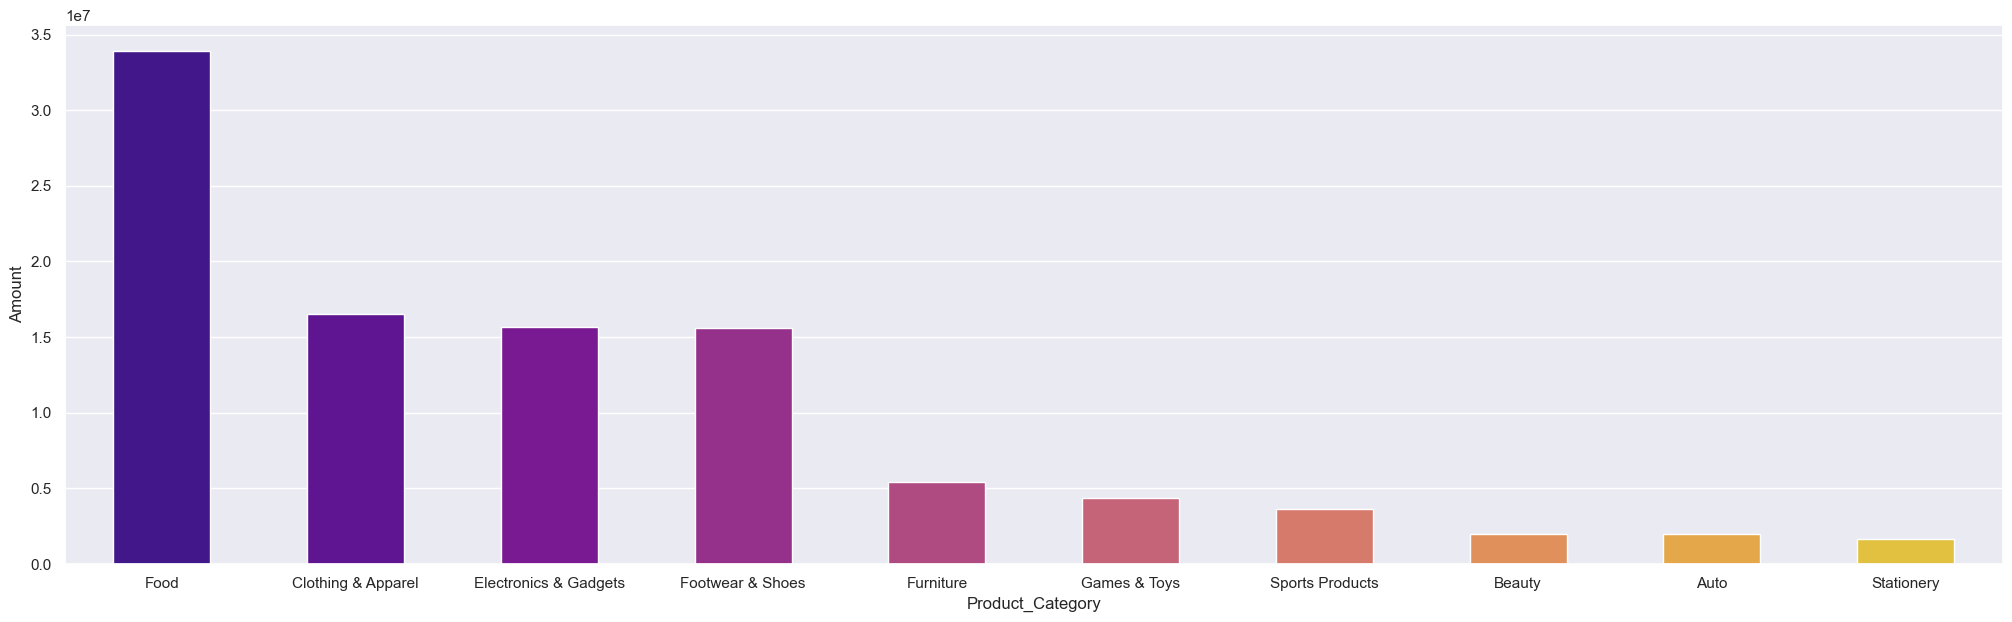

In [357]:
dx=df.groupby('Product_Category')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False).head(10)
dx=sns.barplot(data=dx, x='Product_Category', y='Amount',palette='plasma',width=0.5)

plt.show()

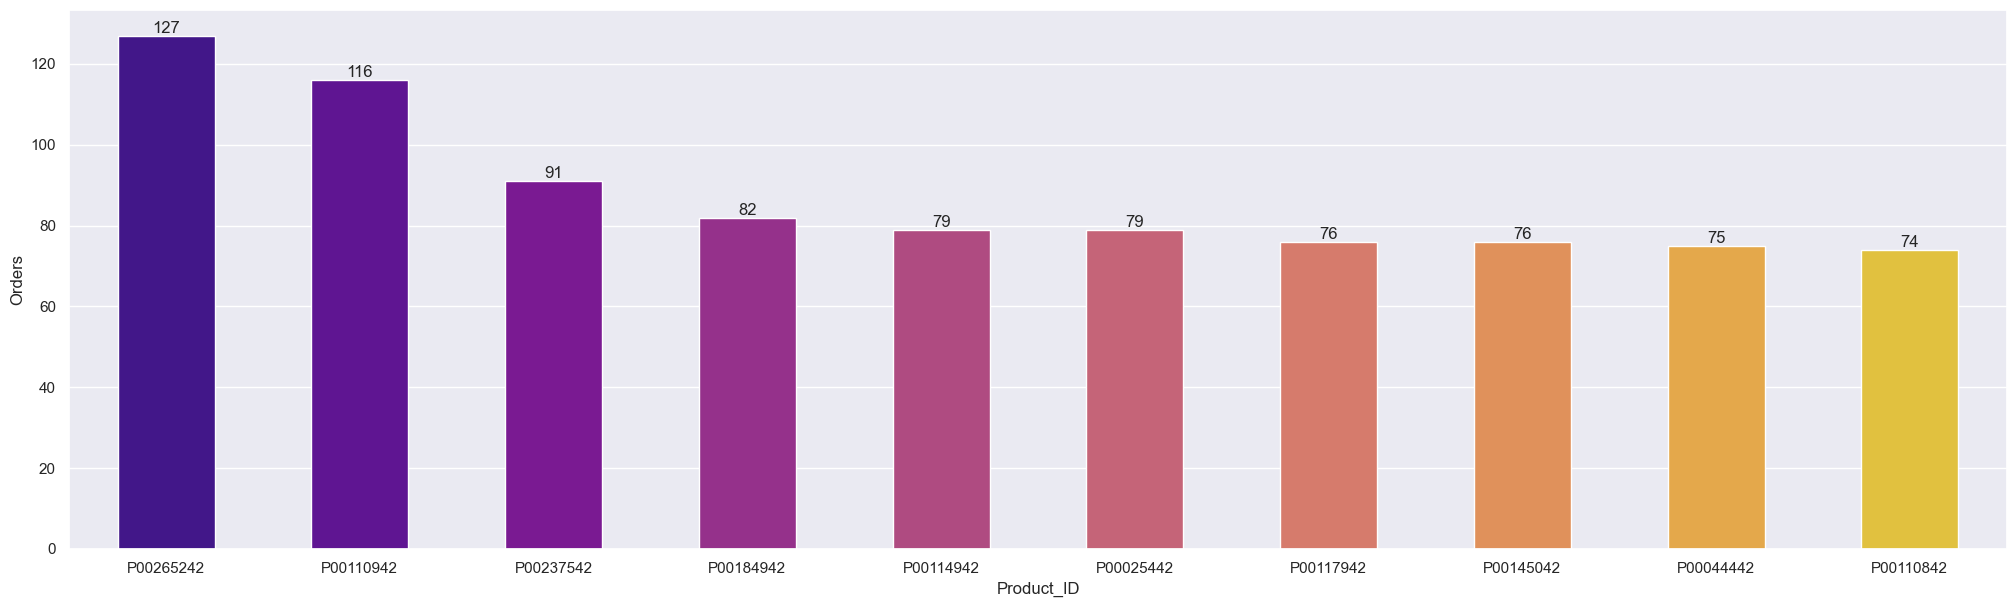

In [358]:
ax=df.groupby('Product_ID')['Orders'].sum().reset_index().sort_values(by='Orders', ascending=False).head(10)
ax=sns.barplot(data=ax,x='Product_ID',y='Orders',estimator='sum',palette='plasma',width=0.5)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

*Top 10 most sold products*

# Conclusion

*Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*